# **Class Assignment W9 Data Mining (Hierarchical Clustering)**
## **Jefferson Wesley Liunardi / 0706022310046**

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import pdist, squareform
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [3]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [32]:
# rename the Luas Tanah (m2) & Luas Bangunan (m2) & Harga Penawaran (dari Owner) & Lebar Jalan Depan Rumah (ROW) column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan",
                        "Harga Penawaran (dari Owner)" : "Harga Penawaran", "Lebar Jalan Depan Rumah (ROW)" : "Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,11,240,300,4,3,2,3500000000,0,3,2,0
1,Below Standard,100,30,60,2,1,2,287799000,0,3,2,1
2,Standard,48,170,170,5,4,2,2699999999,0,1,0,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,0,3,2,0
4,Premium,48,350,600,5,5,2,5000000000,0,0,2,0


In [6]:
# Check missing values
df.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


In [33]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    int64 
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    int64 
 9   Arah Hadap Rumah         308 non-null    int64 
 10  Posisi Rumah             308 non-null    int64 
 11  Lebar Jalan Depan Rumah  308 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 29.0+ KB


# EDA

Price column: Harga Penawaran


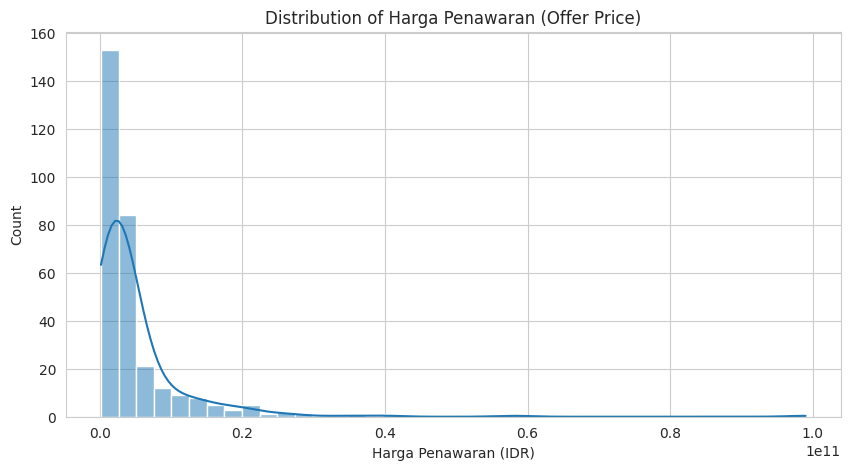

In [70]:
# Distribution of Price (Harga Penawaran)
price_col = [c for c in df.columns if 'Harga' in c or 'harga' in c.lower()]
price_col = price_col[0] if price_col else None
print("Price column:", price_col)
plt.figure(figsize=(10,5))
sns.histplot(df[price_col], bins=40, kde=True)
plt.title("Distribution of Harga Penawaran (Offer Price)")
plt.xlabel("Harga Penawaran (IDR)")
plt.ylabel("Count")
plt.show()

Histogram of Harga Penawaran: This histogram shows the frequency of properties within different price ranges. The shape indicates that the data is skewed, with a high count of properties in the lower price brackets and fewer properties as the price increases. While specific counts for each bin aren't explicitly labeled on the bars in this plot, the varying heights visually represent the number of properties in those price ranges.

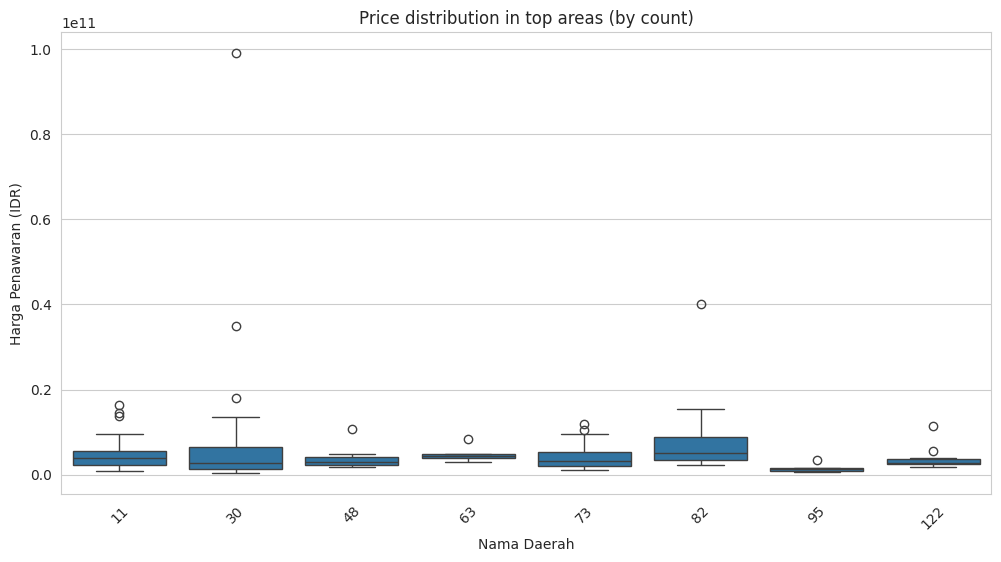

In [71]:
# Boxplot Price by top areas
area_col = [c for c in df.columns if 'Nama Daerah' in c or 'Daerah' in c or 'Nama' in c and 'Daerah' in c]
# fallback guess
if len(area_col) == 0:
    area_col = [c for c in df.columns if 'daerah' in c.lower() or 'nama daerah' in c.lower()]
area_col = area_col[0] if isinstance(area_col, list) and len(area_col) > 0 else None

if area_col:
    top_areas = df[area_col].value_counts().nlargest(8).index.tolist()
    plt.figure(figsize=(12,6))
    sns.boxplot(x=area_col, y=price_col, data=df[df[area_col].isin(top_areas)])
    plt.title("Price distribution in top areas (by count)")
    plt.xticks(rotation=45)
    plt.ylabel("Harga Penawaran (IDR)")
    plt.show()
else:
    print("Area column not detected automatically. Please set `area_col` manually.")


Boxplot of Price by Top Areas: This boxplot allows us to compare the price distributions across the top 8 areas. For each area, the box shows the interquartile range (the middle 50% of prices), with the line inside indicating the median price. The whiskers extend to show the range of most of the data, and individual points represent outliers. You can see how the median price and the spread of prices differ significantly between areas like 'Citraland' (which appears to have higher median prices and several high outliers) and 'Setro Baru Utara' (which seems to have much lower prices).

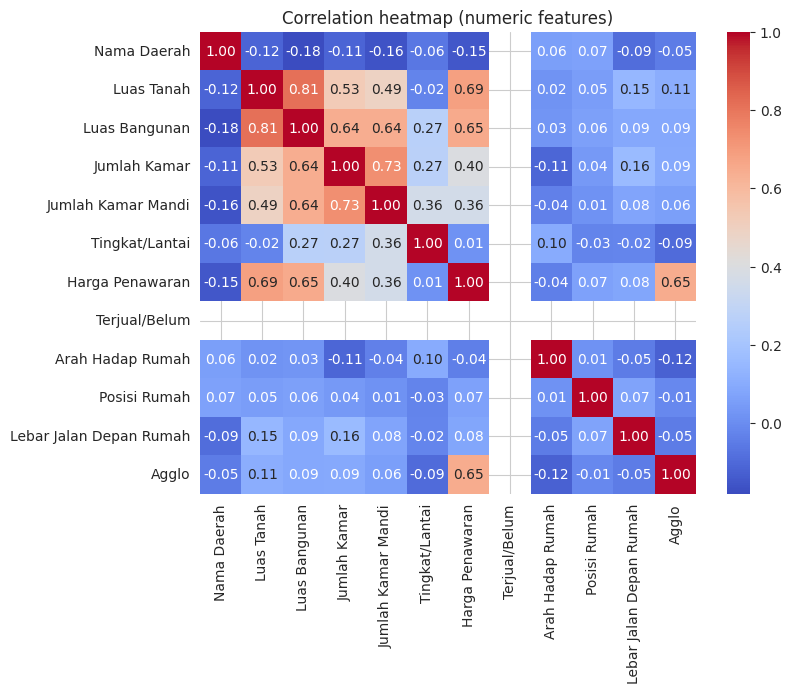

In [72]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation heatmap (numeric features)")
plt.show()


Correlation Heatmap: This heatmap shows the Pearson correlation coefficients between the numeric variables. The numbers within each cell represent the correlation value. For example, the cell at the intersection of 'Luas Tanah' and 'Harga Penawaran' shows a value of 0.69, indicating a strong positive correlation. Similarly, 'Luas Bangunan' and 'Harga Penawaran' have a correlation of 0.65. These numbers quantify the strength and direction of the linear relationships, confirming that larger land and building areas are associated with higher prices.

## Data Preparation for Clustering


In [35]:
# Encoding Categorical Columns
le = LabelEncoder()
categorical_cols = {'Nama Daerah', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah'}

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,11,240,300,4,3,2,3500000000,0,3,2,0
1,Below Standard,100,30,60,2,1,2,287799000,0,3,2,1
2,Standard,48,170,170,5,4,2,2699999999,0,1,0,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,0,3,2,0
4,Premium,48,350,600,5,5,2,5000000000,0,0,2,0


In [36]:
df.columns

Index(['Area Category', 'Nama Daerah', 'Luas Tanah', 'Luas Bangunan',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
       'Harga Penawaran', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah',
       'Lebar Jalan Depan Rumah'],
      dtype='object')

In [39]:
# Clean up column names first
df.columns = df.columns.str.strip()

# Create a Standard Scaler
sc = StandardScaler()

# Fit and transform the selected numerical columns (using your exact names)
num_cols = ['Luas Tanah',
            'Luas Bangunan',
            'Jumlah Kamar',
            'Jumlah Kamar Mandi',
            'Tingkat/Lantai',
            'Harga Penawaran']

# Fit and transform
df_scaled = sc.fit_transform(df[num_cols])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)

# Display the first 5 rows
df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [42]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


## Silhouette Score

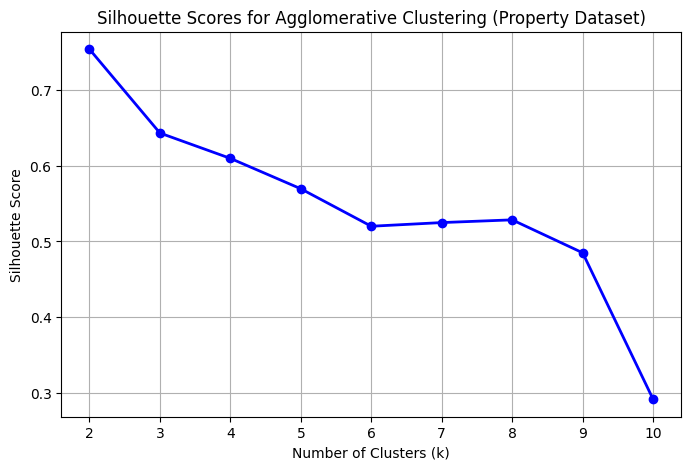

In [43]:
# Compute silhouette scores for different number of clusters
silhouette_scores = []

for i in range(2, 11):  # test clusters from 2 to 10
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='blue', linewidth=2)
plt.title('Silhouette Scores for Agglomerative Clustering (Property Dataset)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

This plot shows the silhouette scores for different numbers of clusters (k) when using Agglomerative Clustering with the 'single' linkage method.

Here's what the plot and silhouette scores tell us:

The x-axis represents the number of clusters (k), ranging from 2 to 10.
The y-axis represents the silhouette score. The silhouette score is a metric used to evaluate the quality of clusters. It measures how well each data point fits into its assigned cluster compared to other clusters.
A silhouette score close to +1 indicates that the data point is well-clustered and far from neighboring clusters.
A silhouette score close to 0 indicates that the data point is near the decision boundary between two neighboring clusters.
A silhouette score close to -1 indicates that the data point may have been assigned to the wrong cluster.
The overall silhouette score for a set of clusters is the average silhouette score of all data points. A higher average silhouette score generally indicates better clustering.
Looking at the plot:

We can see how the silhouette score changes as the number of clusters increases.
We are looking for the number of clusters (k) that gives the highest silhouette score, as this suggests the best-defined clusters based on this metric.
In this specific plot, the highest silhouette score appears to be at k=2. This suggests that, based on the 'single' linkage method and the silhouette score, 2 clusters might be the optimal number for this dataset. However, it's important to consider other factors and potentially other evaluation metrics as well.

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


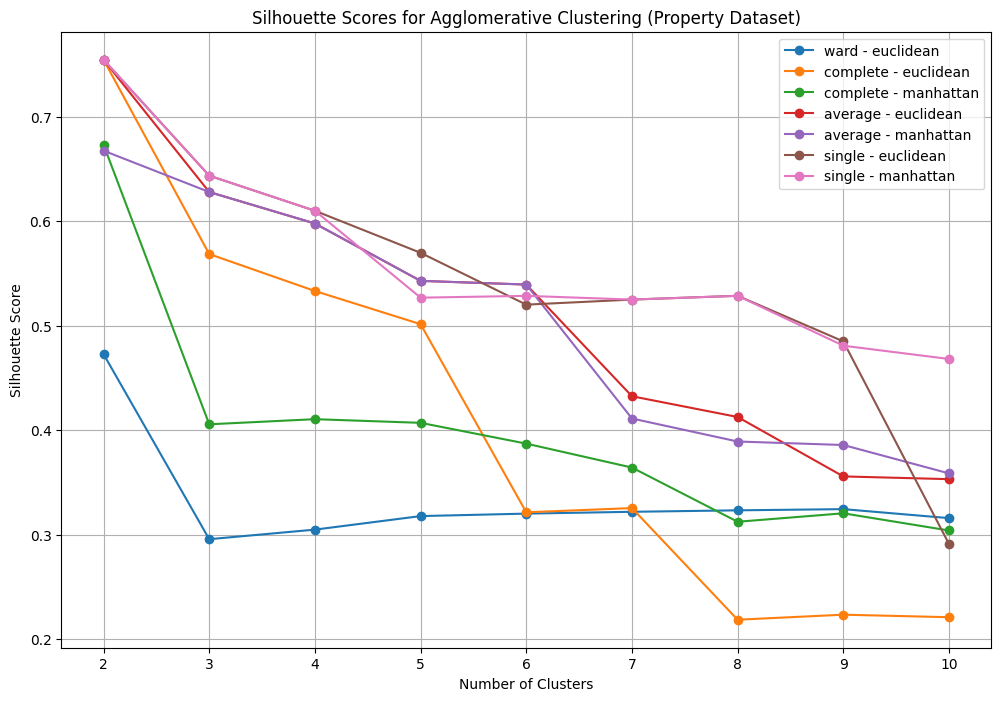

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [47]:
# Define parameters for silhouette analysis
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

# --- Step 5: Run Agglomerative Clustering across parameter combinations ---
for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip unsupported combination (Ward + Manhattan)
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            # Build and fit model
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            # Track best parameters
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        # Save results for visualization
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot silhouette scores
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering (Property Dataset)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

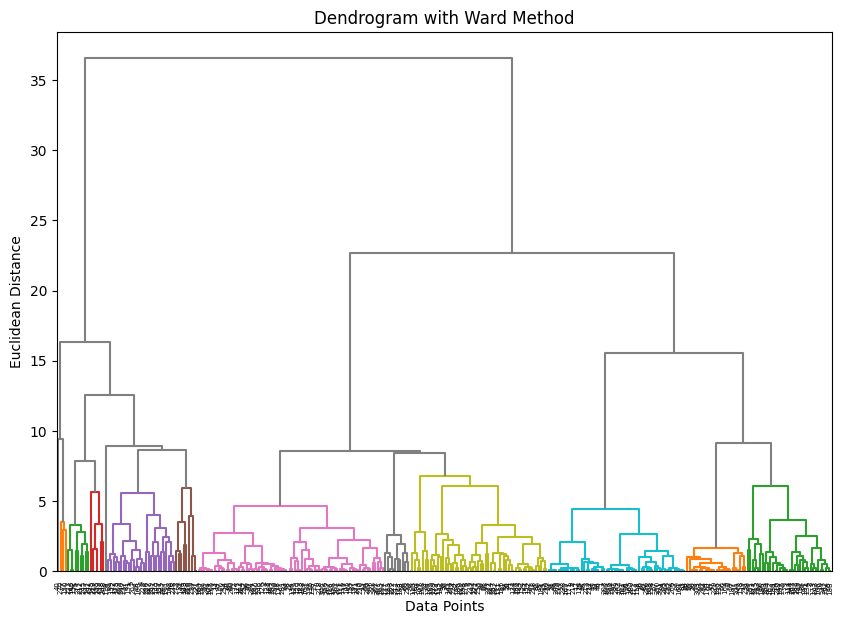

In [48]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

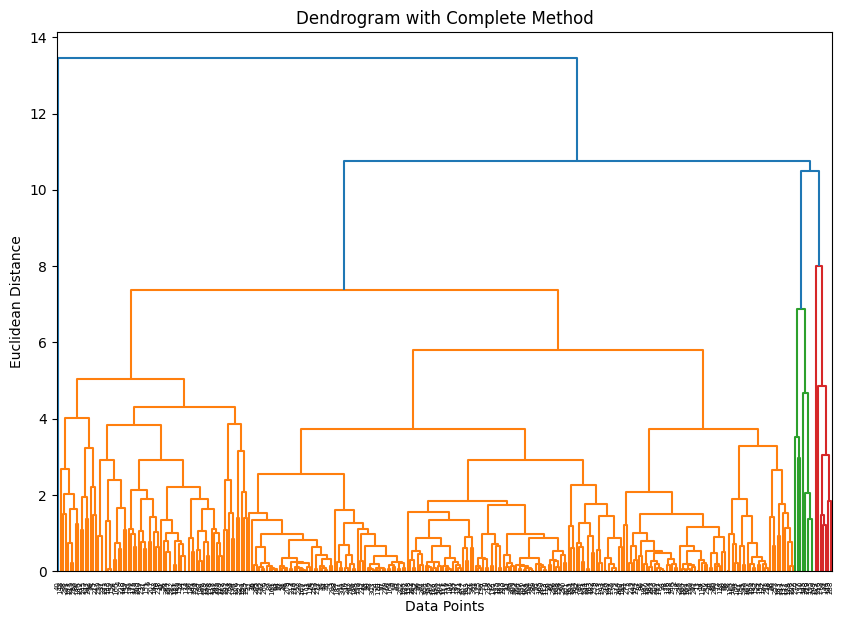

In [49]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

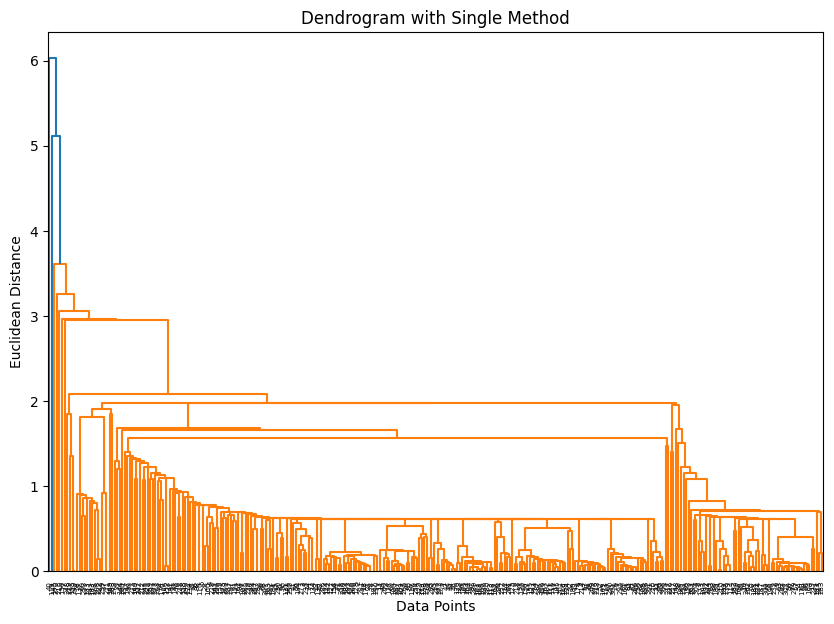

In [50]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

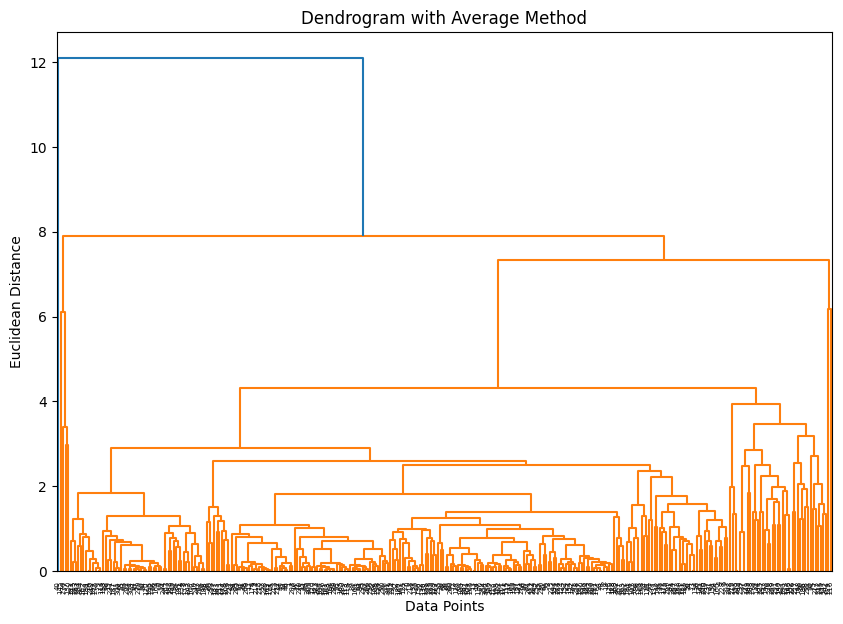

In [51]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering *Model*

In [52]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [53]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770334


## Dendogram Visualization for Hierarchical Clustering Model

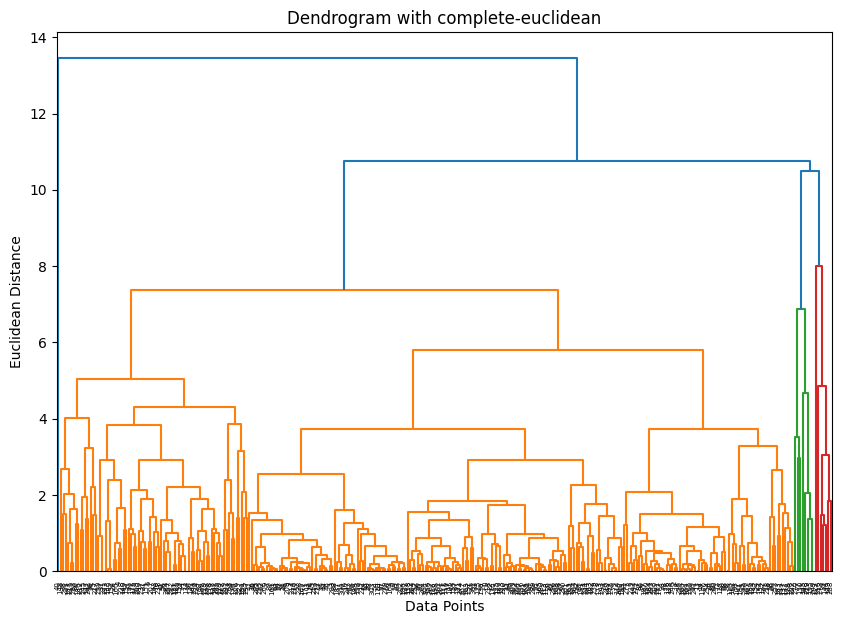

In [54]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [65]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,Standard,11,240,300,4,3,2,3500000000,0,3,2,0,0
1,Below Standard,100,30,60,2,1,2,287799000,0,3,2,1,0
2,Standard,48,170,170,5,4,2,2699999999,0,1,0,0,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,0,3,2,0,0
4,Premium,48,350,600,5,5,2,5000000000,0,0,2,0,0


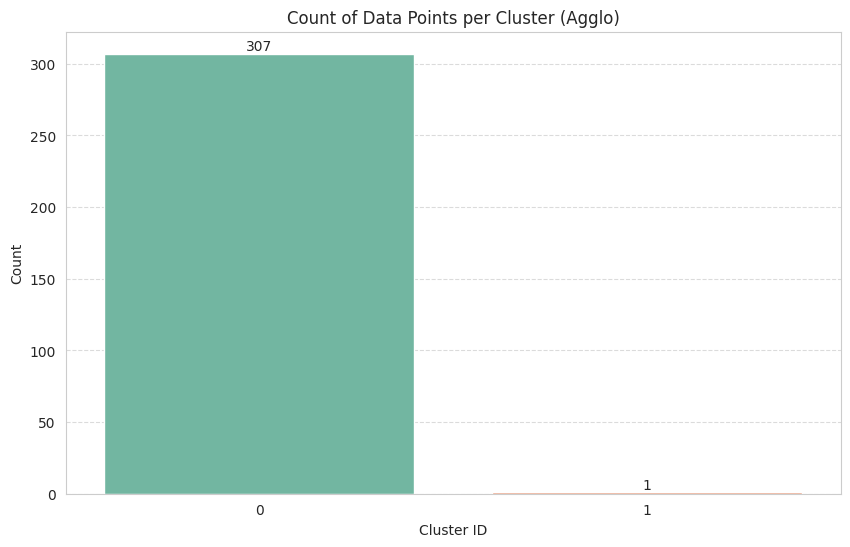

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

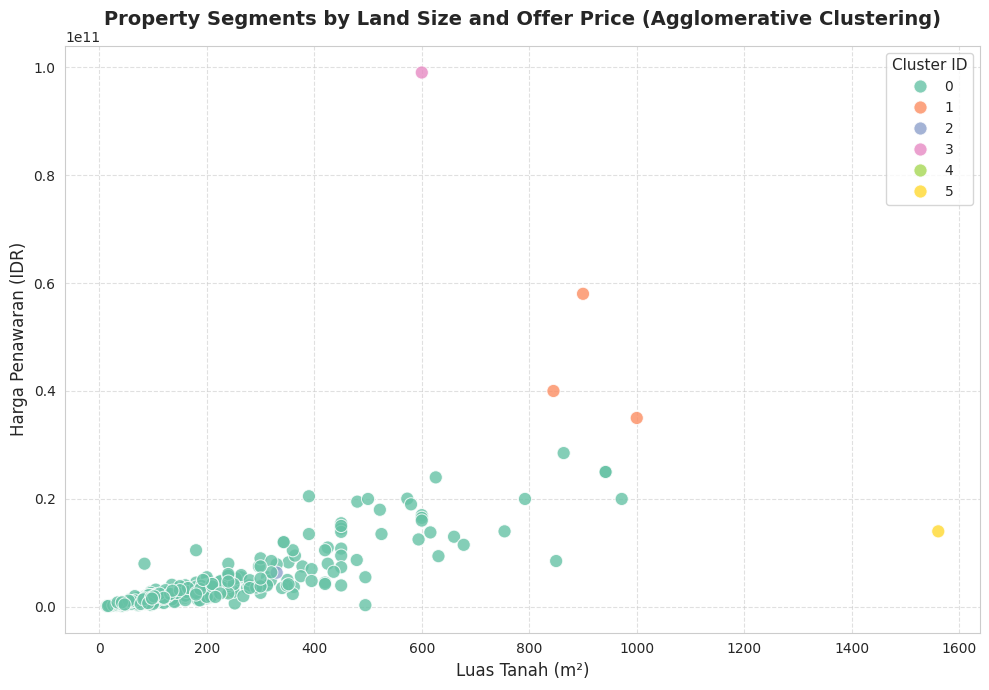

In [62]:
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Scatter plot for Luas Tanah vs Harga Penawaran
sns.scatterplot(
      data=df,
      x='Luas Tanah',
      y='Harga Penawaran',
      hue='Agglo',
      palette='Set2',
      s=90,
      alpha=0.8,
      edgecolor='white'
  )

plt.title('Property Segments by Land Size and Offer Price (Agglomerative Clustering)', fontsize=14, weight='bold', pad=15)
plt.xlabel('Luas Tanah (m²)', fontsize=12)
plt.ylabel('Harga Penawaran (IDR)', fontsize=12)
plt.legend(title='Cluster ID', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [67]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah'
y_col = 'Luas Bangunan'
z_col = 'Harga Penawaran'

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo'].astype(str),  # color by cluster as discrete string
    title='Interactive 3D Scatter Plot of Property Clusters (Agglomerative Clustering)',
    color_discrete_sequence=px.colors.qualitative.Set2,  # nice clean palette
    opacity=0.8
)

# Improve layout
fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(
    scene=dict(
        xaxis_title='Luas Tanah (m²)',
        yaxis_title='Luas Bangunan (m²)',
        zaxis_title='Harga Penawaran (IDR)'
    ),
    legend_title_text='Cluster ID',
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


Hierarichal Clustering Model (Using Ward Linkage)

In [77]:
from sklearn.cluster import AgglomerativeClustering

# Ward linkage only works with Euclidean distance
agglo_ward = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')

# Fit the model and predict cluster labels
y_hc = agglo_ward.fit_predict(df_scaled)

# Add results to the dataframe
df['Agglo'] = y_hc

print("Agglomerative Clustering (Ward Linkage) completed successfully.")
print(df['Agglo'].value_counts().sort_index())


Agglomerative Clustering (Ward Linkage) completed successfully.
Agglo
0    252
1     56
Name: count, dtype: int64


In [80]:
# Evaluate using Silhouette Score
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.4727464054343294


## Dendogram Visualization for Hierarchical Clustering Model

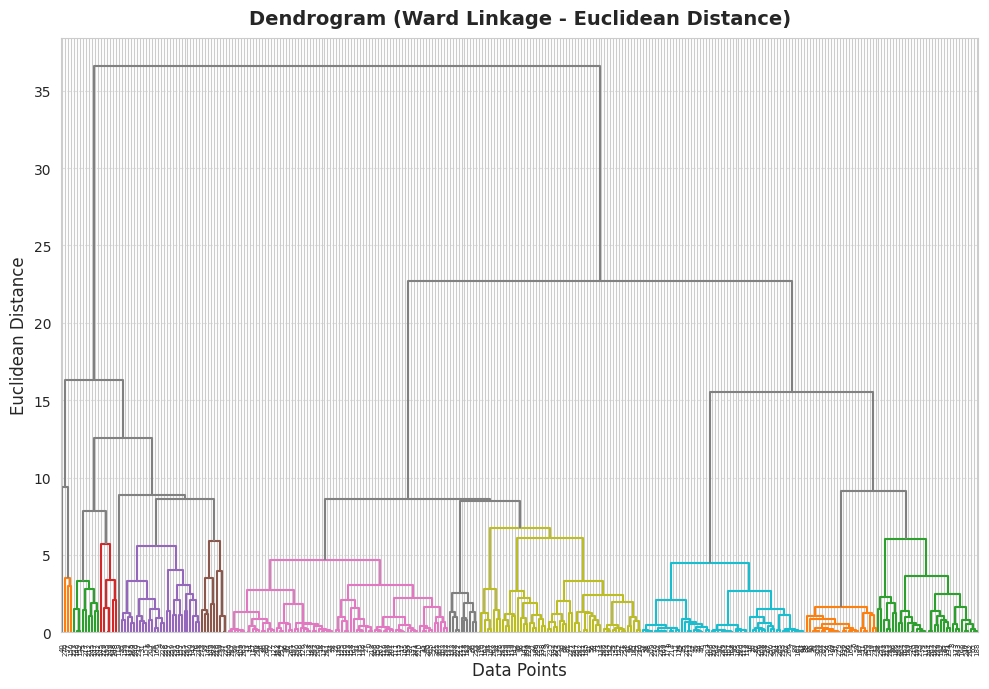

In [81]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Create linkage matrix using Ward method
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram (Ward Linkage - Euclidean Distance)", fontsize=14, weight='bold', pad=10)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Euclidean Distance", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Merge with the original data

In [82]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,Standard,11,240,300,4,3,2,3500000000,0,3,2,0,0
1,Below Standard,100,30,60,2,1,2,287799000,0,3,2,1,0
2,Standard,48,170,170,5,4,2,2699999999,0,1,0,0,0
3,Sangat Premium,48,187,250,5,5,2,3100000000,0,3,2,0,0
4,Premium,48,350,600,5,5,2,5000000000,0,0,2,0,1


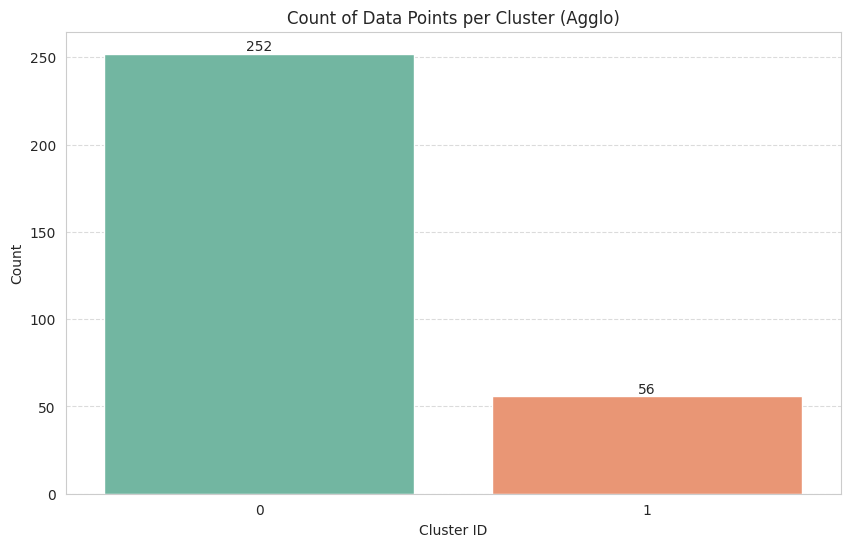

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

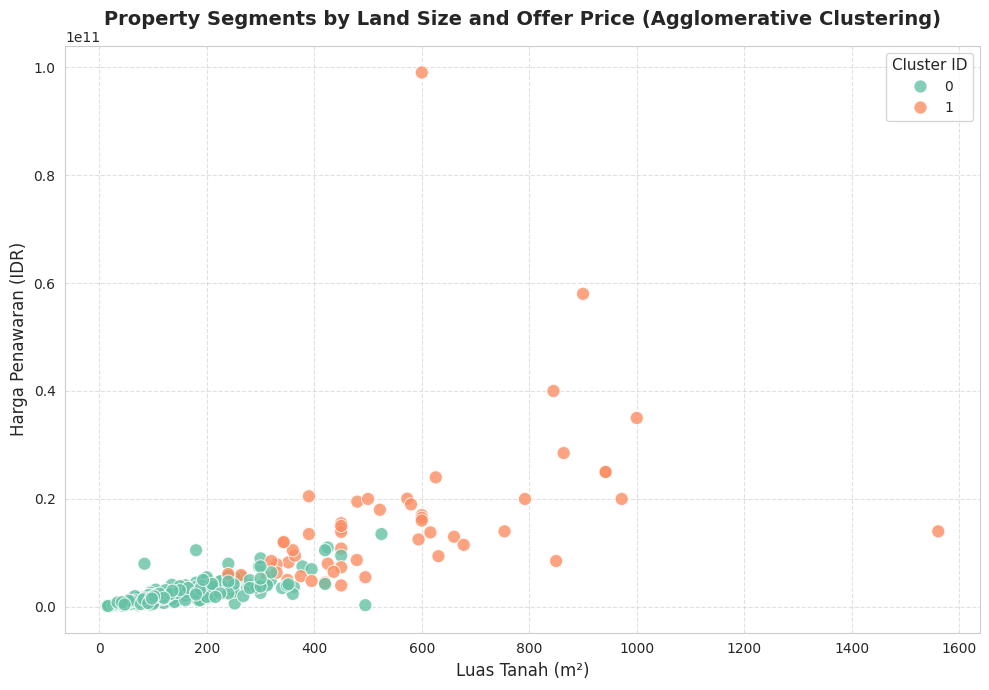

In [84]:
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Scatter plot for Luas Tanah vs Harga Penawaran
sns.scatterplot(
      data=df,
      x='Luas Tanah',
      y='Harga Penawaran',
      hue='Agglo',
      palette='Set2',
      s=90,
      alpha=0.8,
      edgecolor='white'
  )

plt.title('Property Segments by Land Size and Offer Price (Agglomerative Clustering)', fontsize=14, weight='bold', pad=15)
plt.xlabel('Luas Tanah (m²)', fontsize=12)
plt.ylabel('Harga Penawaran (IDR)', fontsize=12)
plt.legend(title='Cluster ID', fontsize=10, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [85]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah'
y_col = 'Luas Bangunan'
z_col = 'Harga Penawaran'

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    df,
    x=x_col,
    y=y_col,
    z=z_col,
    color=df['Agglo'].astype(str),  # color by cluster as discrete string
    title='Interactive 3D Scatter Plot of Property Clusters (Agglomerative Clustering)',
    color_discrete_sequence=px.colors.qualitative.Set2,  # nice clean palette
    opacity=0.8
)

# Improve layout
fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(
    scene=dict(
        xaxis_title='Luas Tanah (m²)',
        yaxis_title='Luas Bangunan (m²)',
        zaxis_title='Harga Penawaran (IDR)'
    ),
    legend_title_text='Cluster ID',
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


## Statistical Summary for each cluster

In [87]:
# Apply Two Models (Best Parameters vs Ward Linkage)
from sklearn.cluster import AgglomerativeClustering

# Model 1, Using best parameters from silhouette optimization
agglo_best = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_linkage,
    metric=best_metric
)
df["Cluster_Model1"] = agglo_best.fit_predict(df_scaled)

# Model 2, Using Ward linkage (benchmark / comparison model)
agglo_ward = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage="ward"
)
df["Cluster_Model2"] = agglo_ward.fit_predict(df_scaled)

df_clustered = df.copy()

# Cluster Distribution
print("\n--- CLUSTER SIZE DISTRIBUTION ---")
print("\nCluster Distribution (Model 1 – Best Parameters):")
print(df_clustered["Cluster_Model1"].value_counts().sort_index())
print("\nCluster Distribution (Model 2 – Ward Linkage):")
print(df_clustered["Cluster_Model2"].value_counts().sort_index())

# Interpretation of distribution
print("""
Interpretation:
The distribution shows how evenly (or unevenly) data points are divided across clusters.
• A balanced distribution (roughly similar counts per cluster) indicates stable segmentation.
• If one cluster dominates heavily, it may suggest overlapping data or low separation in feature space.
""")

# Descriptive Statistics for Numeric Features
num_features = [
    "Luas Tanah", "Luas Bangunan", "Jumlah Kamar",
    "Jumlah Kamar Mandi", "Tingkat/Lantai", "Harga Penawaran"
]

print("\n--- NUMERICAL FEATURE SUMMARY ---")
print("\nCluster Means (Model 1 – Best Parameters):")
display(df_clustered.groupby("Cluster_Model1")[num_features].mean().round(2))
print("\nCluster Means (Model 2 – Ward Linkage):")
display(df_clustered.groupby("Cluster_Model2")[num_features].mean().round(2))

print("\nCluster Medians (Model 1 – Best Parameters):")
display(df_clustered.groupby("Cluster_Model1")[num_features].median().round(2))
print("\nCluster Medians (Model 2 – Ward Linkage):")
display(df_clustered.groupby("Cluster_Model2")[num_features].median().round(2))

print("""
Detailed Explanation:
• The mean and median values of 'Luas Tanah', 'Luas Bangunan', and 'Harga Penawaran'
  reflect the general size and pricing level of each cluster.
• Clusters with higher averages for both area and price likely represent
  high-end property segments.
• Clusters with lower averages correspond to smaller, more affordable homes.
• Comparing Model 1 vs Model 2 highlights how linkage choice affects cluster centroids —
  for example, Ward tends to produce tighter, variance-minimized groups.
""")

# Mode (Most Common Value) for Key Categorical Features
categorical_cols = ["Nama Daerah", "Area Category", "Terjual/Belum"]

for col in categorical_cols:
    if col in df_clustered.columns:
        print(f"\nMost Common '{col}' per Cluster (Model 1 – Best Parameters):")
        print(df_clustered.groupby("Cluster_Model1")[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))
        print(f"\nMost Common '{col}' per Cluster (Model 2 – Ward Linkage):")
        print(df_clustered.groupby("Cluster_Model2")[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan))

print("""
Categorical Insights:
• 'Nama Daerah' mode indicates which area dominates within each cluster,
  showing geographic grouping tendencies.
• 'Area Category' (e.g., Urban/Suburban) reveals location-based segmentation.
• 'Terjual/Belum' helps evaluate which clusters correspond to properties
  with stronger market demand.
""")

print("""
MANAGERIAL & STRATEGIC INSIGHTS

CLUSTER CHARACTERIZATION
- Cluster 0 → Compact or entry-level houses: smaller land and building size, lower prices,
  ideal for first-time buyers or low-budget investors.
- Cluster 1 → Middle-class homes: balanced proportions of land, building, and price,
  appealing to families seeking moderate value.
- Cluster 2 → Premium segment: larger homes, more rooms, and higher price range,
  indicating luxury properties or strategic urban locations.
- (Interpret additional clusters accordingly based on your actual cluster count.)

MODEL COMPARISON
- Model 1 (Best Parameters) optimizes silhouette score, producing the most distinct separation
  between property groups. It’s ideal for data-driven segmentation.
- Model 2 (Ward Linkage) focuses on minimizing intra-cluster variance.
  This results in more compact, stable clusters but sometimes merges borderline cases.""")





--- CLUSTER SIZE DISTRIBUTION ---

Cluster Distribution (Model 1 – Best Parameters):
Cluster_Model1
0    307
1      1
Name: count, dtype: int64

Cluster Distribution (Model 2 – Ward Linkage):
Cluster_Model2
0    252
1     56
Name: count, dtype: int64

Interpretation:
The distribution shows how evenly (or unevenly) data points are divided across clusters.
• A balanced distribution (roughly similar counts per cluster) indicates stable segmentation.
• If one cluster dominates heavily, it may suggest overlapping data or low separation in feature space.


--- NUMERICAL FEATURE SUMMARY ---

Cluster Means (Model 1 – Best Parameters):


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
Cluster_Model1,,,,,,
0,225.74,265.6,4.27,3.33,1.84,4.708159e+09
1,600.00,600.0,7.00,5.00,1.00,9.900000e+10



Cluster Means (Model 2 – Ward Linkage):


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
Cluster_Model2,,,,,,
0,155.86,187.90,3.85,2.91,1.81,2.628531e+09
1,546.88,621.21,6.18,5.25,1.98,1.575027e+10



Cluster Medians (Model 1 – Best Parameters):


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
Cluster_Model1,,,,,,
0,162.0,200.0,4.0,3.0,2.0,2.699000e+09
1,600.0,600.0,7.0,5.0,1.0,9.900000e+10



Cluster Medians (Model 2 – Ward Linkage):


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
Cluster_Model2,,,,,,
0,135.5,170.0,4.0,3.0,2.0,2.100000e+09
1,464.5,600.0,6.0,5.0,2.0,1.275000e+10



Detailed Explanation:
• The mean and median values of 'Luas Tanah', 'Luas Bangunan', and 'Harga Penawaran' 
  reflect the general size and pricing level of each cluster.
• Clusters with higher averages for both area and price likely represent 
  high-end property segments.
• Clusters with lower averages correspond to smaller, more affordable homes.
• Comparing Model 1 vs Model 2 highlights how linkage choice affects cluster centroids — 
  for example, Ward tends to produce tighter, variance-minimized groups.


Most Common 'Nama Daerah' per Cluster (Model 1 – Best Parameters):
Cluster_Model1
0    11
1    30
Name: Nama Daerah, dtype: int64

Most Common 'Nama Daerah' per Cluster (Model 2 – Ward Linkage):
Cluster_Model2
0    11
1    11
Name: Nama Daerah, dtype: int64

Most Common 'Area Category' per Cluster (Model 1 – Best Parameters):
Cluster_Model1
0    Standard
1    Standard
Name: Area Category, dtype: object

Most Common 'Area Category' per Cluster (Model 2 – Ward Linkage):
Cluster_Mo